In [1]:
import zipfile

with zipfile.ZipFile('archive (9).zip', 'r') as zip_ref:
    zip_ref.extractall()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential,Model
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import SGD,Adam
import tensorflow as tf
import seaborn as sns
import os
import glob

C:\Users\Tripti Mishra\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_path = "Brain Tumor dataset/Training"
test_path = "Brain Tumor dataset/Testing"

gl_tr = "Brain Tumor dataset/Training/glioma_tumor"
men_tr = "Brain Tumor dataset/Training/meningioma_tumor"
no_tr = "Brain Tumor dataset/Training/no_tumor"
pit_tr = "Brain Tumor dataset/Training/pituitary_tumor"


gl_ts = "Brain Tumor dataset/Testing/glioma_tumor"
men_ts = "Brain Tumor dataset/Testing/meningioma_tumor"
no_ts = "Brain Tumor dataset/Testing/no_tumor"
pit_ts = "Brain Tumor dataset/Testing/pituitary_tumor"

gl_tr = os.listdir(gl_tr)
men_tr = os.listdir(men_tr)
no_tr = os.listdir(no_tr)
pit_tr = os.listdir(pit_tr)

gl_ts = os.listdir(gl_ts)
men_ts = os.listdir(men_ts)
no_ts = os.listdir(no_ts)
pit_ts = os.listdir(pit_ts)

In [3]:
print(len(gl_tr))
print(len(men_tr))
print(len(no_tr))
print(len(pit_tr))

826
822
395
827


In [4]:
print(len(gl_ts))
print(len(men_ts))
print(len(no_ts))
print(len(pit_ts))

100
115
105
74


In [5]:
gl_tr_label = [0]*len(gl_tr)
men_tr_label = [1]*len(men_tr)
no_tr_label = [2]*len(no_tr)
pit_tr_label = [3]*len(pit_tr)

gl_ts_label = [0]*len(gl_ts)
men_ts_label = [1]*len(men_ts)
no_ts_label = [2]*len(no_ts)
pit_ts_label = [3]*len(pit_ts)

In [6]:
train_label = gl_tr_label + men_tr_label + no_tr_label + pit_tr_label
test_label = gl_ts_label + men_ts_label + no_ts_label + pit_ts_label

In [7]:
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [8]:
label = train_label + test_label
len(label)

3264

In [9]:
train_datagen = ImageDataGenerator(featurewise_center=False,
                                   rotation_range = 5, fill_mode="nearest",
                                   zoom_range=[1/1.0, 1/1.0], width_shift_range=0.0, height_shift_range=0.0, # occasionally out of range
                                   horizontal_flip = True, vertical_flip=True,
                                   brightness_range=[0.5, 1.3], channel_shift_range=20)

In [10]:
train_generator = train_datagen.flow_from_directory('Brain Tumor dataset/Training',
                                                    batch_size=32,
                                                    color_mode='grayscale',
                                                    shuffle = False,
                                                    target_size=(150,150),
                                                    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory('Brain Tumor dataset/Testing',
                                                         batch_size=32,
                                                         color_mode='grayscale',
                                                         shuffle = False,
                                                         target_size=(150,150),
                                                         class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


In [11]:
#if you want to use tranfer learning, skip this cell
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 64)        1

In [13]:
history = model.fit(
    train_generator,
   
    epochs=100,
    verbose=1,
   
    validation_data=validation_generator,
    
)

Epoch 1/100
90/90 [==============================] - 84s 932ms/step - loss: 1.7059 - accuracy: 0.3718 - val_loss: 1.2655 - val_accuracy: 0.4833
Epoch 2/100
90/90 [==============================] - 75s 839ms/step - loss: 1.2285 - accuracy: 0.4561 - val_loss: 1.1809 - val_accuracy: 0.4920
Epoch 3/100
90/90 [==============================] - 76s 840ms/step - loss: 1.1908 - accuracy: 0.4624 - val_loss: 1.1877 - val_accuracy: 0.4990
Epoch 4/100
90/90 [==============================] - 76s 842ms/step - loss: 1.1264 - accuracy: 0.5073 - val_loss: 1.1296 - val_accuracy: 0.5575
Epoch 5/100
90/90 [==============================] - 77s 859ms/step - loss: 1.0966 - accuracy: 0.5216 - val_loss: 1.1598 - val_accuracy: 0.5244
Epoch 6/100
90/90 [==============================] - 76s 844ms/step - loss: 1.0522 - accuracy: 0.5366 - val_loss: 1.1354 - val_accuracy: 0.5139
Epoch 7/100
90/90 [==============================] - 75s 837ms/step - loss: 1.0545 - accuracy: 0.5429 - val_loss: 1.0778 - val_accuracy:

<Figure size 432x288 with 0 Axes>

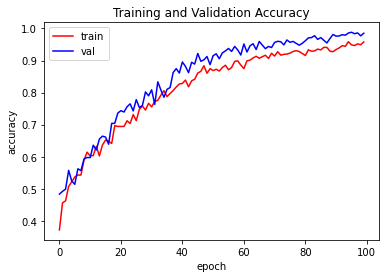

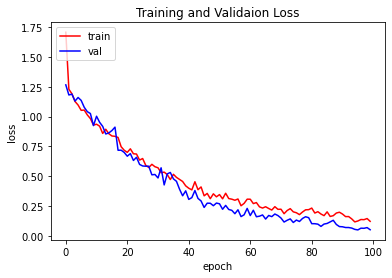

<Figure size 432x288 with 0 Axes>

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [15]:
predictions = model.predict(validation_generator)

90/90 [==============================] - 36s 389ms/step


In [16]:
model.evaluate_generator(validation_generator)

C:\Users\Tripti Mishra\AppData\Local\Temp\ipykernel_23040\3378472596.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.05552550032734871, 0.986759603023529]

In [18]:
y_pred = np.argmax(predictions, axis = 1)
y_pred

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [19]:
y_true = validation_generator.classes

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[815,   8,   2,   1],
       [ 17, 799,   4,   2],
       [  0,   3, 391,   1],
       [  1,   2,   0, 824]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       826
           1       0.98      0.97      0.98       822
           2       0.98      0.99      0.99       395
           3       1.00      1.00      1.00       827

    accuracy                           0.99      2870
   macro avg       0.99      0.99      0.99      2870
weighted avg       0.99      0.99      0.99      2870



In [23]:
diseases_labels = []

for key, value in train_generator.class_indices.items():
 diseases_labels.append(key)

In [33]:
def evaluate(actual, pred):
  pre = []
  for i in pred:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

 

  fig, ax = plt.subplots(figsize=(10,8))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

Accuracy: 0.9857142857142858


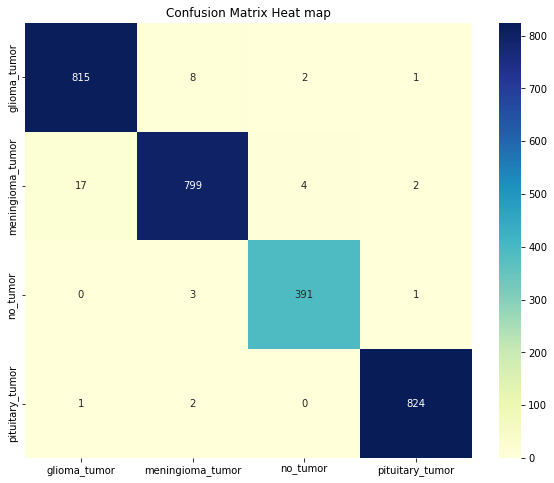

In [34]:
evaluate(validation_generator.classes,predictions)

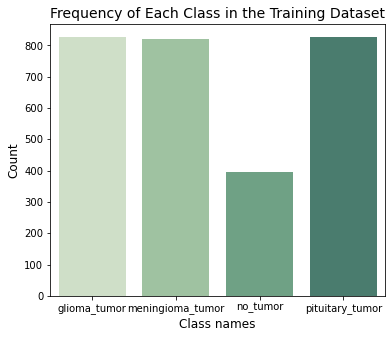

In [40]:
class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

glioma_tumor = len(os.listdir('Brain Tumor dataset/Training/glioma_tumor'))
meningioma_tumor = len(os.listdir('Brain Tumor dataset/Training/meningioma_tumor'))
no_tumor = len(os.listdir('Brain Tumor dataset/Training/no_tumor'))
pituitary_tumor = len(os.listdir('Brain Tumor dataset/Training/pituitary_tumor'))
images = [glioma_tumor, meningioma_tumor, no_tumor, pituitary_tumor]

plt.figure(figsize=(6,5))
sns.barplot(x= class_names, y= images, palette= sns.cubehelix_palette(start=2.8, rot=-.4))
plt.title('Frequency of Each Class in the Training Dataset', fontsize=14)
plt.xlabel('Class names', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(images)))
plt.show()

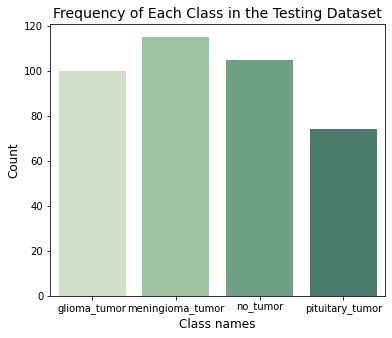

In [39]:
class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

glioma_tumor = len(os.listdir('Brain Tumor dataset/Testing/glioma_tumor'))
meningioma_tumor = len(os.listdir('Brain Tumor dataset/Testing/meningioma_tumor'))
no_tumor = len(os.listdir('Brain Tumor dataset/Testing/no_tumor'))
pituitary_tumor = len(os.listdir('Brain Tumor dataset/Testing/pituitary_tumor'))
images = [glioma_tumor, meningioma_tumor, no_tumor, pituitary_tumor]

plt.figure(figsize=(6,5))
sns.barplot(x= class_names, y= images, palette= sns.cubehelix_palette(start=2.8, rot=-.4))
plt.title('Frequency of Each Class in the Testing Dataset', fontsize=14)
plt.xlabel('Class names', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(images)))
plt.show()